**First Section will be random closures of roads, meaning random removal of edges until the network becomes two componenents**

In [25]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

In [26]:
df = pd.read_csv("GoldCoast_network.csv")
df_simple_net = df[["From","To"]]
df_simple_net

G = nx.from_pandas_edgelist(df_simple_net,source = "From", target="To", create_using=nx.DiGraph())
Nodes = G.number_of_nodes()
Edges = G.number_of_edges()
Nodes, Edges

(4783, 11140)

In [103]:
edges_list = G.edges()
edges_list
print(nx.number_strongly_connected_components(G))

1


**Fine approach, but easily broken by the fact many nodes have degree 1.**

In [179]:
def random_closure(graph):
    edgelist = list(graph.edges())
    np.random.seed(42)
    iter = 0
    edge_removed_list = []
  
    while nx.number_weakly_connected_components(graph) < 4:
        edge = edgelist[np.random.randint(len(edgelist))]
        edge_removed_list.append(edge)
        graph.remove_edge(*edge)
        edgelist.remove(edge)
        #print(f"{edge} removed")
        iter += 1
    return iter, edge_removed_list, list(nx.weakly_connected_components(graph))
    

In [33]:
def random_closure_thresh(graph, threshold = 0.5):
    G = graph.copy()
    edgelist =list(G.edges())
    N = G.number_of_nodes()
    edge_removed_list = []
    iter = 0

    current_gc_size = N

    while current_gc_size >= threshold*N:
        edge_index = np.random.randint(len(edgelist))
        edge = edgelist.pop(edge_index)
        G.remove_edge(*edge)
        edge_removed_list.append(edge)
        iter += 1

        components = list(nx.weakly_connected_components(G))
        current_gc_size = max(len(c) for c in components)

    return iter, edge_removed_list, G


In [34]:
iter, removed_edges,graph = random_closure_thresh(G)

KeyboardInterrupt: 

In [35]:
for i in range(10):
    iter, removed_edges,graph = random_closure_thresh(G)
    print(f"ran {i} times: ",iter)

ran 0 times:  3749
ran 1 times:  3807
ran 2 times:  4271
ran 3 times:  4026
ran 4 times:  3713
ran 5 times:  3542
ran 6 times:  4294
ran 7 times:  4058
ran 8 times:  3915
ran 9 times:  3740


In [180]:
G_copy = G.copy()

In [185]:
iters, removed_edges, components = random_closure(G_copy)

components_1 = components[0]
components_2 = components[1]
    

{54}

In [175]:
color_map = []
color_comp_1 = 'blue'
color_comp_2 = 'green'

# Iterate through all nodes in the graph
for node in G.nodes():
    if node in components_1:
        color_map.append(color_comp_1)
    else: # If it's not in component_1, it must be in component_2 (since there are only two)
        color_map.append(color_comp_2)

In [106]:
nodes = pd.read_csv("nodes.csv")
edges = df_simple_net
pos = {row.node: (row.x, row.y) for _, row in nodes.iterrows()}

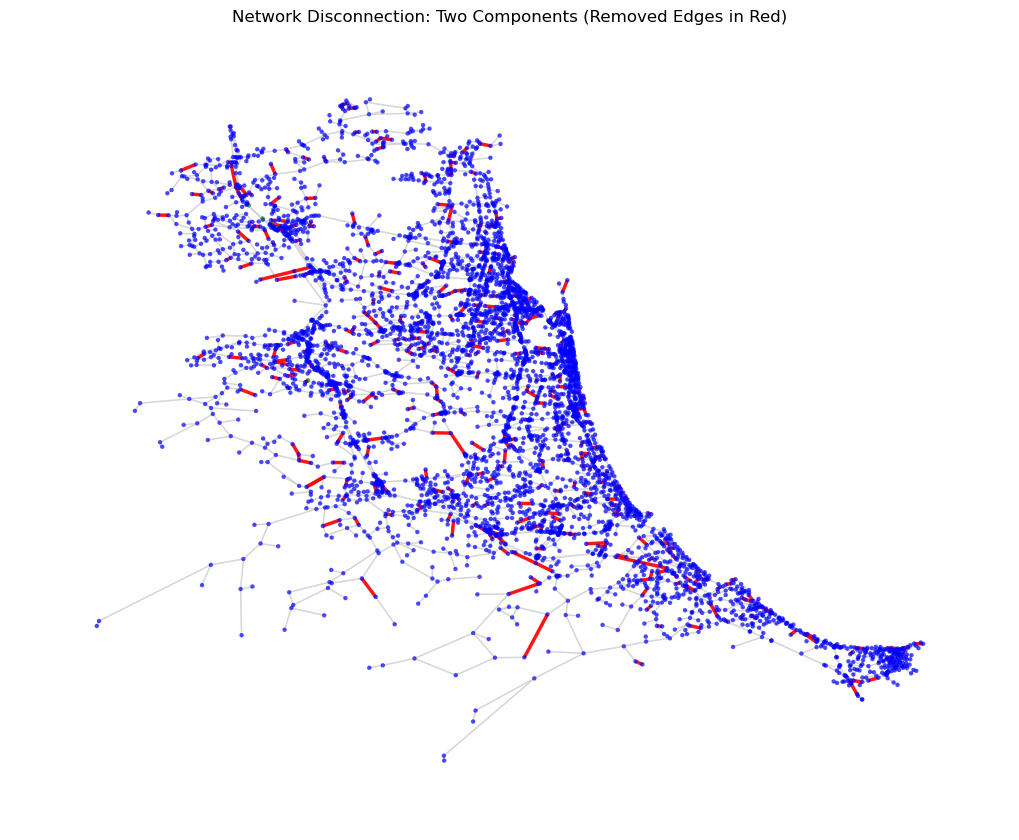

In [177]:
plt.figure(figsize=(10, 8))

# 3a. Draw ALL nodes with component colors, and the *existing* edges (in the graph G)
nx.draw(
    G,
    pos,
    with_labels=False,
    node_size=10, # Increased size for better visibility of colors
    linewidths=0,
    arrows=False,
    node_color=color_map,  # <--- Use the new color list here
    edge_color="lightgray",  # Color the remaining edges faintly
    alpha=0.7,
)

# 3b. Overlay the removed edges in red
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=removed_edges, # Assuming removed_edges is the result of random_closure
    edge_color="red",
    style="-",
    arrows=False,
    width=2.5,        # thicker line to highlight
    alpha=0.9
)

plt.title(f"Network Disconnection: Two Components (Removed Edges in Red)")
plt.show()

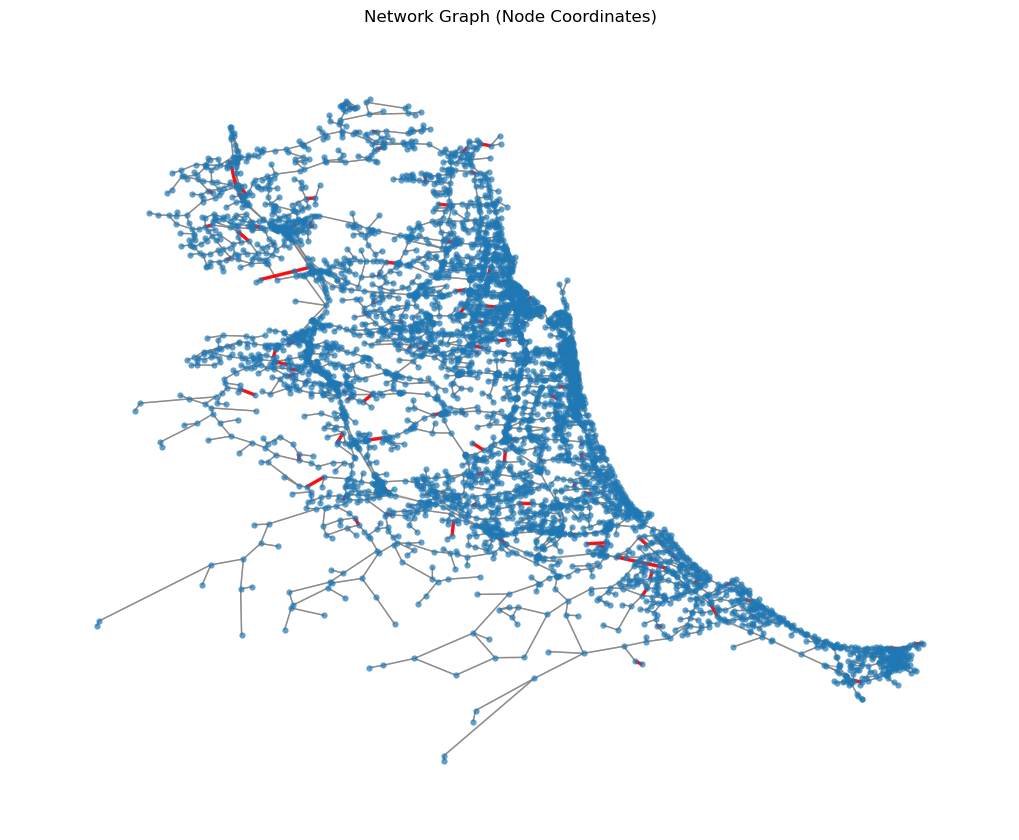

In [158]:
plt.figure(figsize=(10, 8))
nx.draw(
    G,
    pos,
    with_labels=False,
    node_size=20,
    linewidths=0,
    arrows=False,
    edge_color="gray",
    alpha=0.7,
)
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=removed_edges,
    edge_color="red",
    style="-",
    arrows=False,
    width=2.5,        # thicker line to highlight
    alpha=0.9
)

plt.title("Network Graph (Node Coordinates)")
plt.show()

In [19]:
def target_closure(graph):
    centrality = nx.edge_betweenness_centrality(graph)
    edgelist = list(graph.edges())
    iter = 0

    while nx.number_weakly_connected_components(graph) < 2:
        edge = max(centrality,key=centrality.get)
        graph.remove_edge(*edge)
        centrality = nx.edge_betweenness_centrality(graph, k=800)
        iter+=1
    return iter, list(nx.weakly_connected_components(graph))
        

In [20]:
iters, components = target_closure(G.copy())

In [22]:
components[1]

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185